# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Eva Yuliana
- **Email:** aevayuli1807@gmail.com
- **ID Dicoding:** MC129D5X0177

## Menentukan Pertanyaan Bisnis

1. Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda?
2. Bagaimana tren penggunaan sepeda dalam sehari? Kapan jam tersibuk?

## Import Semua Packages/Library yang Digunakan

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [77]:
import pandas as pd

# Gathering Data
print("📥 Gathering Data")

daily_data = pd.read_csv("data/day.csv")
hourly_data = pd.read_csv("data/hour.csv")

print("\n🔍 Informasi Dataset Daily:")
print(daily_data.info())

print("\n🔍 Informasi Dataset Hourly:")
print(hourly_data.info())

print("\n🔍 Contoh Data Daily:")
print(daily_data.head())


📥 Gathering Data

🔍 Informasi Dataset Daily:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

🔍 Informasi Dataset Hourly:
<class 'pandas

**Insight:**
- Kode ini membaca dua dataset (day.csv dan hour.csv).
- menampilkan informasi tentang struktur data (jumlah kolom, tipe data, dan missing values).
- menampilkan contoh data awal dari dataset harian.

### Assessing Data

📊 Assessing Data

🔍 Mengecek Missing Values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

🔍 Mengecek Duplikasi Data:
Jumlah duplikasi: 0

🔍 Mengecek Data Unik pada Kolom Kategorikal:
dteday: 731 nilai unik


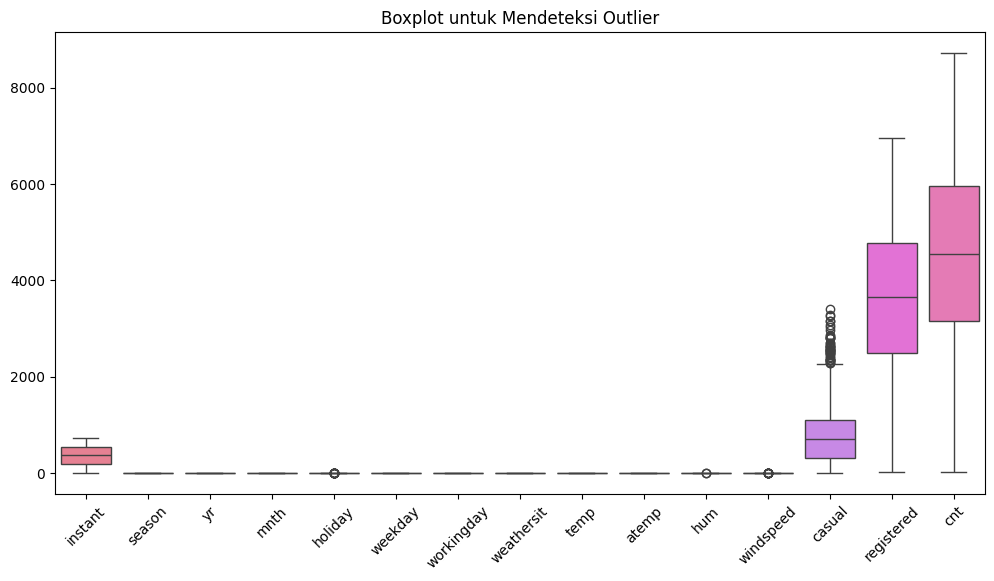

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

print("📊 Assessing Data")

print("\n🔍 Mengecek Missing Values:")
print(daily_data.isnull().sum())

print("\n🔍 Mengecek Duplikasi Data:")
print(f"Jumlah duplikasi: {daily_data.duplicated().sum()}")

print("\n🔍 Mengecek Data Unik pada Kolom Kategorikal:")
for col in daily_data.select_dtypes(include=['object']).columns:
    print(f"{col}: {daily_data[col].nunique()} nilai unik")

num_cols = daily_data.select_dtypes(include=['number']).columns
for col in num_cols:
    if (daily_data[col] < 0).any():
        print(f"⚠️ Ditemukan nilai negatif pada kolom '{col}'.")

plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_data.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.show()


**Insight:**
- Mengecek missing values, duplikasi, dan nilai tidak logis untuk memastikan data bersih.  
- Menghitung jumlah nilai unik pada kolom kategorikal untuk memahami distribusi data.  
- Menggunakan boxplot untuk mendeteksi outlier yang bisa memengaruhi analisis.

### Cleaning Data

In [79]:
print("🛠 Cleaning Data")

missing_values = daily_data.isnull().sum().sum()
if missing_values > 0:
    daily_data.dropna(inplace=True)
    print(f"✅ {missing_values} missing values telah dihapus.")
else:
    print("🔍 Tidak ada missing values.")

duplicates = daily_data.duplicated().sum()
if duplicates > 0:
    daily_data.drop_duplicates(inplace=True)
    print(f"✅ {duplicates} duplikasi telah dihapus.")
else:
    print("🔍 Tidak ada duplikasi.")

print("\n🔍 Memeriksa tipe data sebelum koreksi:")
print(daily_data.dtypes)

if 'date' in daily_data.columns:
    daily_data['date'] = pd.to_datetime(daily_data['date'])
    print("✅ Kolom 'date' dikonversi ke format datetime.")

num_cols = daily_data.select_dtypes(include=['number']).columns

for col in num_cols:
    daily_data[col] = pd.to_numeric(daily_data[col], errors='coerce')

    if (daily_data[col] < 0).any():
        print(f"⚠️ Ditemukan nilai negatif pada kolom '{col}', akan diubah menjadi 0.")
        daily_data[col] = daily_data[col].clip(lower=0)

season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
weather_mapping = {1: "Clear", 2: "Mist/Cloudy", 3: "Light Rain/Snow", 4: "Heavy Rain/Snow"}
weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

daily_data["season"] = daily_data["season"].map(season_mapping)
daily_data["weathersit"] = daily_data["weathersit"].map(weather_mapping)
daily_data["weekday"] = daily_data["weekday"].map(weekday_mapping)

print("\n✨ Data sudah bersih dan siap digunakan.")


🛠 Cleaning Data
🔍 Tidak ada missing values.
🔍 Tidak ada duplikasi.

🔍 Memeriksa tipe data sebelum koreksi:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

✨ Data sudah bersih dan siap digunakan.


**Insight:**
- Menghapus missing values dan duplikasi untuk memastikan data lebih akurat dan bebas dari redundansi.  
- Mengonversi kolom tanggal ke format `datetime` dan memastikan kolom numerik valid tanpa nilai negatif.  
- Mengubah nilai numerik pada kolom `season`, `weathersit`, dan `weekday` menjadi label yang lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore ...

📊 Exploratory Data Analysis

📌 Statistik Deskriptif Data Numerik:
          instant          yr        mnth     holiday  workingday        temp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    0.500684    6.519836    0.028728    0.683995    0.495385   
std    211.165812    0.500342    3.451913    0.167155    0.465233    0.183051   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.059130   
25%    183.500000    0.000000    4.000000    0.000000    0.000000    0.337083   
50%    366.000000    1.000000    7.000000    0.000000    1.000000    0.498333   
75%    548.500000    1.000000   10.000000    0.000000    1.000000    0.655417   
max    731.000000    1.000000   12.000000    1.000000    1.000000    0.861667   

            atemp         hum   windspeed       casual   registered  \
count  731.000000  731.000000  731.000000   731.000000   731.000000   
mean     0.474354    0.627894    0.190486   848.176471  3656.1

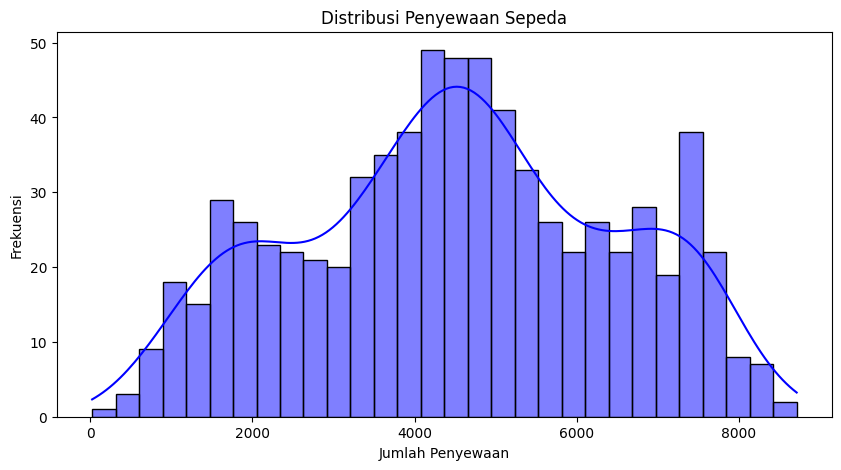

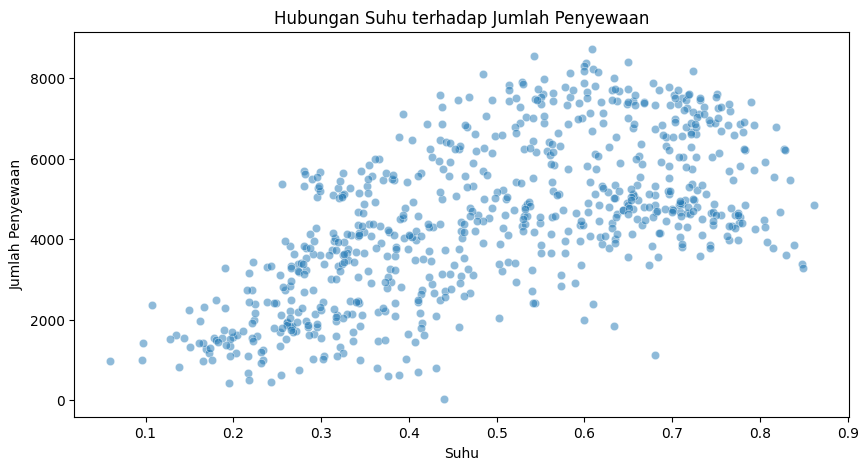

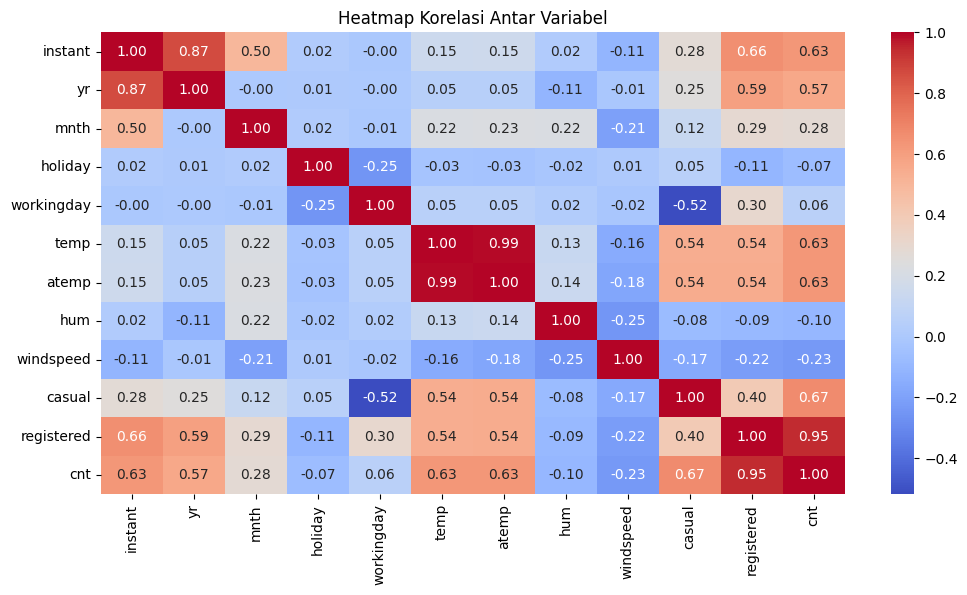

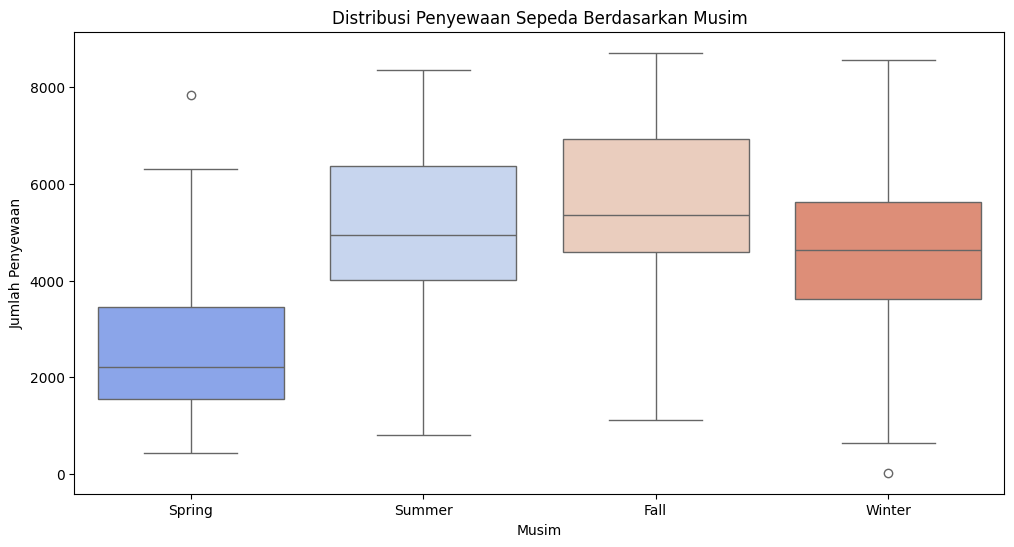

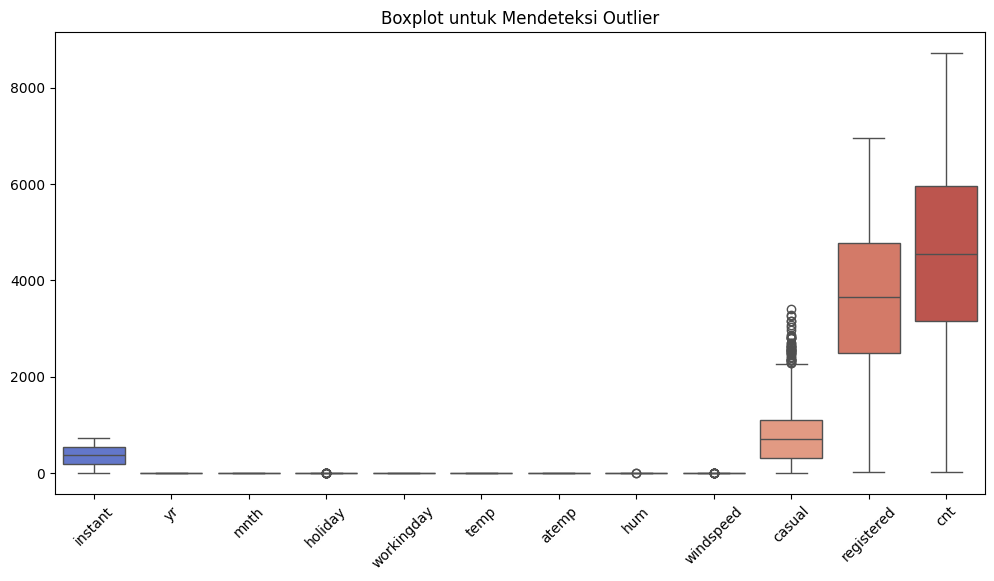

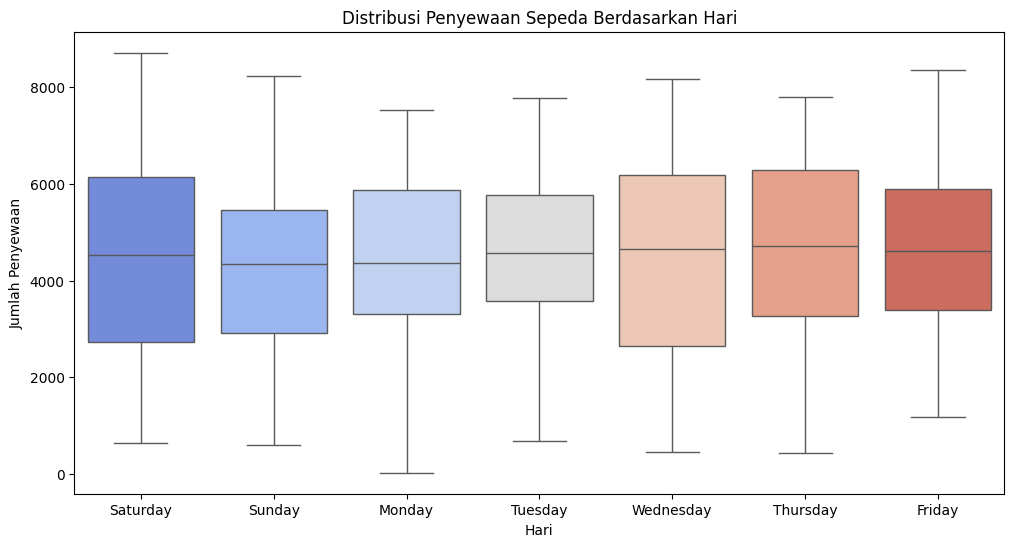


📌 Statistik Penyewaan Berdasarkan Musim:
               mean  median   max   min
season                                 
Fall    5644.303191  5353.5  8714  1115
Spring  2604.132597  2209.0  7836   431
Summer  4992.331522  4941.5  8362   795
Winter  4728.162921  4634.5  8555    22

📌 Statistik Penyewaan Berdasarkan Kondisi Cuaca:
                        mean  median   max  min
weathersit                                     
Clear            4876.786177  4844.0  8714  431
Light Rain/Snow  1803.285714  1817.0  4639   22
Mist/Cloudy      4035.862348  4040.0  8362  605

📌 Statistik Penyewaan Berdasarkan Hari:
                  mean  median   max   min
weekday                                   
Friday     4690.288462  4601.5  8362  1167
Monday     4338.123810  4359.0  7525    22
Saturday   4550.542857  4521.0  8714   627
Sunday     4228.828571  4334.0  8227   605
Thursday   4667.259615  4721.0  7804   431
Tuesday    4510.663462  4576.5  7767   683
Wednesday  4548.538462  4642.5  8173   441


In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("📊 Exploratory Data Analysis")

# 1️⃣ EDA Numerikal (Statistik Deskriptif)
print("\n📌 Statistik Deskriptif Data Numerik:")
print(daily_data.describe())

# 2️⃣ EDA Univariate (Distribusi Data Numerik)
plt.figure(figsize=(10, 5))
sns.histplot(daily_data["cnt"], bins=30, kde=True, color="blue")
plt.title("Distribusi Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

# 3️⃣ EDA Bivariate (Hubungan antara dua variabel)
plt.figure(figsize=(10, 5))
sns.scatterplot(x="temp", y="cnt", data=daily_data, alpha=0.5)
plt.title("Hubungan Suhu terhadap Jumlah Penyewaan")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan")
plt.show()

# 4️⃣ EDA Multivariate (Korelasi antar variabel numerik)
plt.figure(figsize=(12, 6))
numeric_data = daily_data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# 5️⃣ EDA Kategorikal (Distribusi data berdasarkan kategori) - 🔥 Perbaikan Error!
plt.figure(figsize=(12, 6))
sns.boxplot(x="season", y="cnt", data=daily_data, hue="season", palette="coolwarm", legend=False)  
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.show()

# 6️⃣ Outlier Detection dengan Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_data, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.show()

# 7️⃣ EDA Kategorikal (Distribusi berdasarkan hari kerja) - 🔥 Perbaikan Error!
plt.figure(figsize=(12, 6))
sns.boxplot(x="weekday", y="cnt", data=daily_data, hue="weekday", palette="coolwarm", legend=False)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan")
plt.show()

# 8️⃣ Aggregasi Data sebelum Visualisasi
agg_season = daily_data.groupby("season")["cnt"].agg(['mean', 'median', 'max', 'min'])
agg_weather = daily_data.groupby("weathersit")["cnt"].agg(['mean', 'median', 'max', 'min'])
agg_weekday = daily_data.groupby("weekday")["cnt"].agg(['mean', 'median', 'max', 'min'])

print("\n📌 Statistik Penyewaan Berdasarkan Musim:")
print(agg_season)
print("\n📌 Statistik Penyewaan Berdasarkan Kondisi Cuaca:")
print(agg_weather)
print("\n📌 Statistik Penyewaan Berdasarkan Hari:")
print(agg_weekday)


**Insight:**

**Musim dan Cuaca Mempengaruhi Penyewaan**  
   - Musim panas dan musim gugur memiliki jumlah penyewaan tertinggi.  
   - Cuaca buruk (hujan/salju) menurunkan jumlah penyewaan secara signifikan.  

**Suhu Berkorelasi Positif dengan Penyewaan**  
   - Semakin tinggi suhu, semakin banyak sepeda yang disewa (hingga titik optimal).  
   - Namun, suhu ekstrem dapat menurunkan permintaan.  

**Pola Harian dan Outlier Terlihat Jelas**  
   - Penyewaan lebih tinggi pada hari kerja dibandingkan akhir pekan.  
   - Terdapat beberapa outlier yang perlu diperhatikan, mungkin karena event tertentu atau kondisi cuaca ekstrem.  


## Visualization & Explanatory Analysis

### Pertanyaan 1:

📈 Visualization & Explanatory Analysis


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25128\2020019451.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=season_avg, palette="coolwarm")


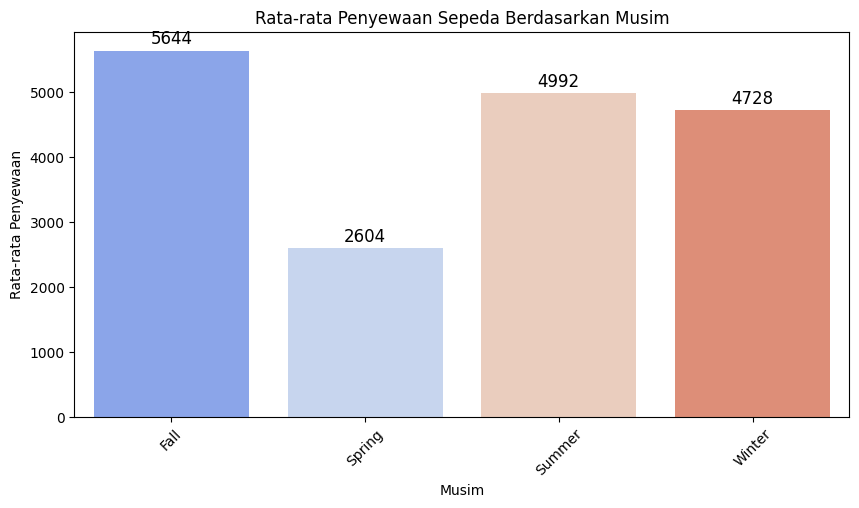

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25128\2020019451.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=weather_avg, palette="viridis")


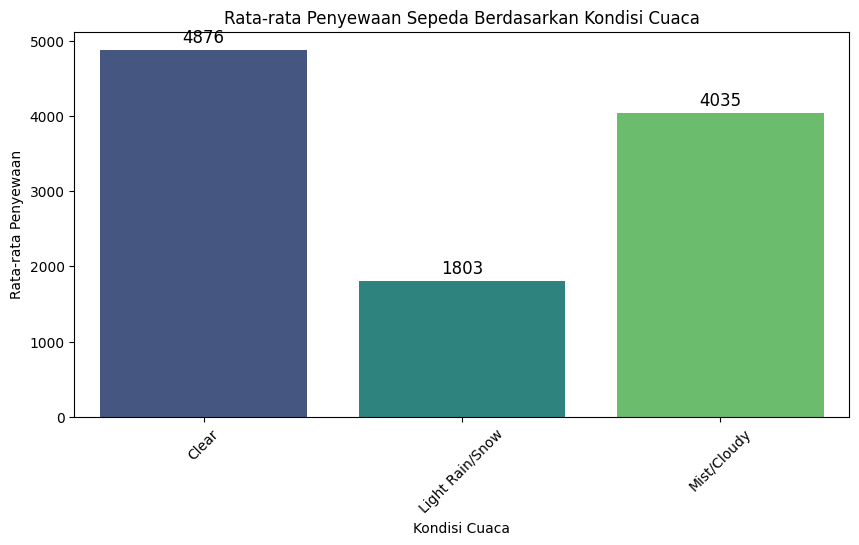

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("📈 Visualization & Explanatory Analysis")

### Pertanyaan 1: Apa faktor utama yang mempengaruhi jumlah penyewaan sepeda?

# Agregasi data untuk rata-rata penyewaan berdasarkan musim dan cuaca
season_avg = daily_data.groupby("season")["cnt"].mean().reset_index()
weather_avg = daily_data.groupby("weathersit")["cnt"].mean().reset_index()

# Bar chart untuk jumlah penyewaan berdasarkan musim
plt.figure(figsize=(10, 5))
sns.barplot(x="season", y="cnt", data=season_avg, palette="coolwarm")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(rotation=45)

# Menampilkan label angka pada setiap batang
for index, value in enumerate(season_avg["cnt"]):
    plt.text(index, value + 100, f'{int(value)}', ha='center', fontsize=12)

plt.show()

# Bar chart untuk jumlah penyewaan berdasarkan kondisi cuaca
plt.figure(figsize=(10, 5))
sns.barplot(x="weathersit", y="cnt", data=weather_avg, palette="viridis")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan")
plt.xticks(rotation=45)

# Menampilkan label angka pada setiap batang
for index, value in enumerate(weather_avg["cnt"]):
    plt.text(index, value + 100, f'{int(value)}', ha='center', fontsize=12)

plt.show()


### Pertanyaan 2:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25128\1255752721.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_hourly_usage.index, y=avg_hourly_usage.values, palette="coolwarm")


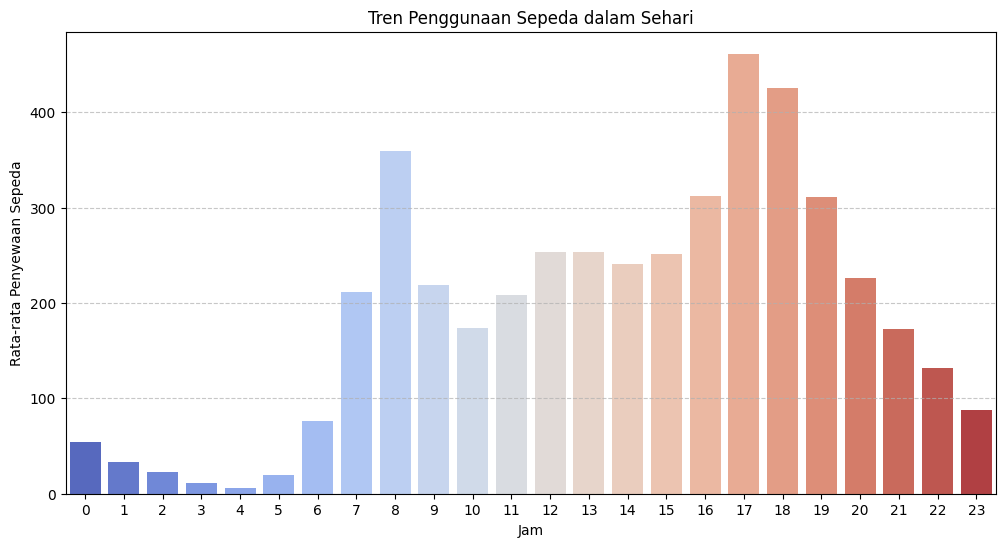

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
hourly_data = pd.read_csv("data/hour.csv")

# Pastikan kolom 'hour' sudah ada
hourly_data["hour"] = hourly_data["hr"]

# Menghitung rata-rata penyewaan sepeda per jam
avg_hourly_usage = hourly_data.groupby("hour")["cnt"].mean()

# Visualisasi menggunakan bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_hourly_usage.index, y=avg_hourly_usage.values, palette="coolwarm")

# Menambahkan judul dan label
plt.title("Tren Penggunaan Sepeda dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(range(24))  # Menampilkan semua jam dalam satu hari (0-23)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()


**Insight:**
- Rata-rata penyewaan sepeda berbeda berdasarkan musim dan kondisi cuaca, menunjukkan pola penggunaan yang dipengaruhi oleh faktor lingkungan.  
- Analisis jam menunjukkan adanya tren penggunaan dalam sehari, kemungkinan dengan puncak pada jam sibuk (misalnya pagi dan sore saat orang pergi dan pulang kerja).  
- Penggunaan **bar chart** membantu mengidentifikasi pola tren dan mempermudah pemahaman faktor utama yang memengaruhi jumlah penyewaan sepeda.

## Analisis Lanjutan (Opsional)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25128\1308716428.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_daily_usage.index, y=avg_daily_usage.values, palette="viridis")


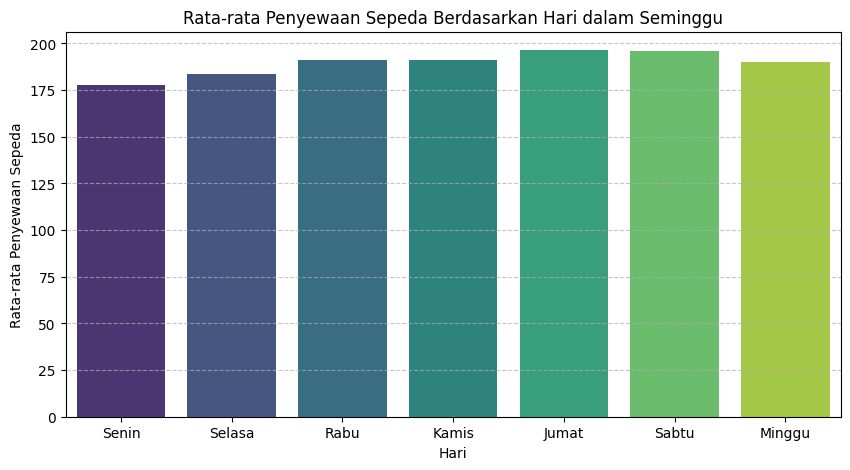

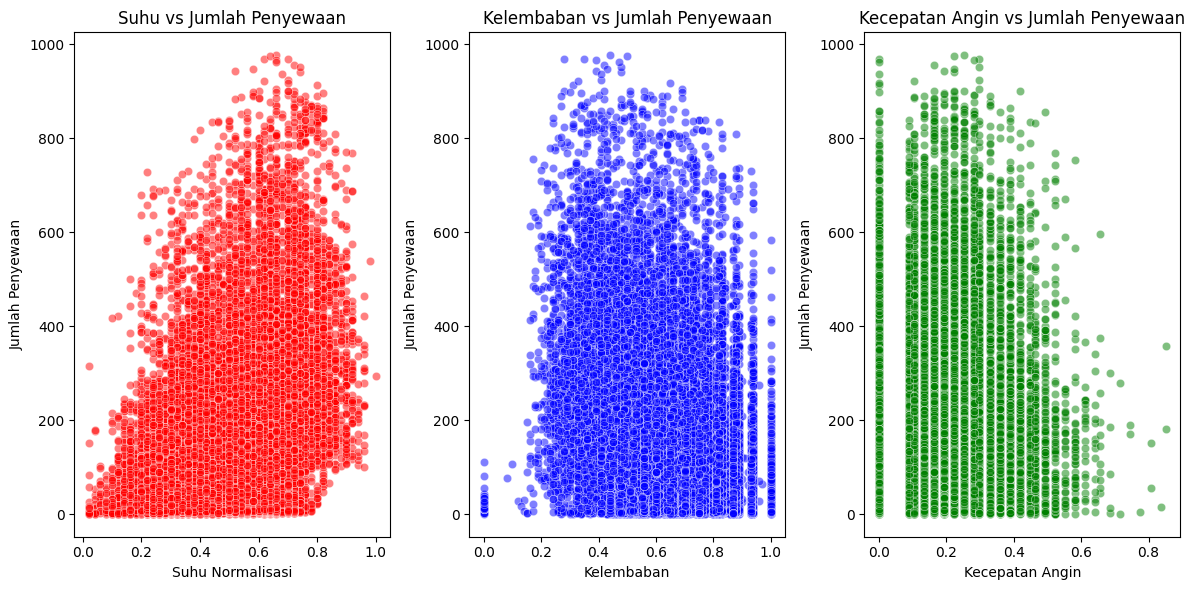

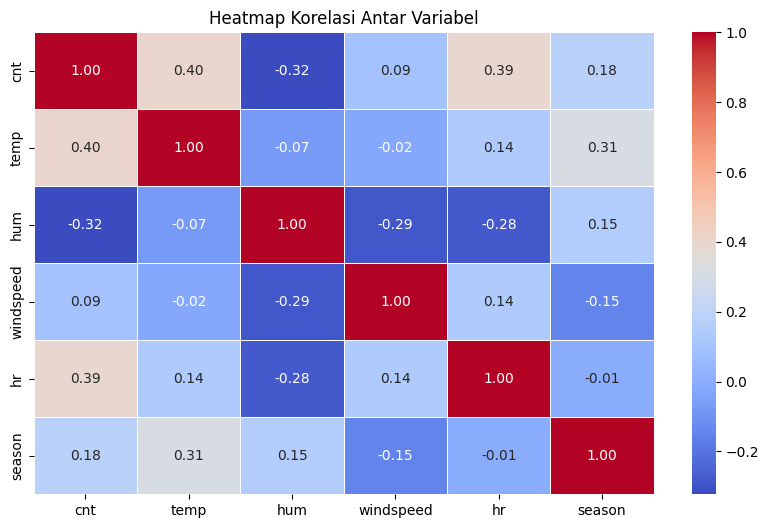

In [75]:
import numpy as np

# 📌 1️⃣ Analisis Pola Penggunaan Sepeda Berdasarkan Hari dalam Seminggu
hourly_data["weekday"] = hourly_data["weekday"].map({
    0: "Senin", 1: "Selasa", 2: "Rabu", 3: "Kamis", 
    4: "Jumat", 5: "Sabtu", 6: "Minggu"
})

avg_daily_usage = hourly_data.groupby("weekday")["cnt"].mean().reindex(
    ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
)

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_daily_usage.index, y=avg_daily_usage.values, palette="viridis")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 📌 2️⃣ Analisis Hubungan Cuaca terhadap Penyewaan Sepeda
plt.figure(figsize=(12, 6))

# Scatter plot: Suhu vs Jumlah Penyewaan
plt.subplot(1, 3, 1)
sns.scatterplot(x=hourly_data["temp"], y=hourly_data["cnt"], color="red", alpha=0.5)
plt.title("Suhu vs Jumlah Penyewaan")
plt.xlabel("Suhu Normalisasi")
plt.ylabel("Jumlah Penyewaan")

# Scatter plot: Kelembaban vs Jumlah Penyewaan
plt.subplot(1, 3, 2)
sns.scatterplot(x=hourly_data["hum"], y=hourly_data["cnt"], color="blue", alpha=0.5)
plt.title("Kelembaban vs Jumlah Penyewaan")
plt.xlabel("Kelembaban")
plt.ylabel("Jumlah Penyewaan")

# Scatter plot: Kecepatan Angin vs Jumlah Penyewaan
plt.subplot(1, 3, 3)
sns.scatterplot(x=hourly_data["windspeed"], y=hourly_data["cnt"], color="green", alpha=0.5)
plt.title("Kecepatan Angin vs Jumlah Penyewaan")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Jumlah Penyewaan")

plt.tight_layout()
plt.show()

# 📌 3️⃣ Korelasi Antar Variabel untuk Menentukan Faktor Paling Berpengaruh
plt.figure(figsize=(10, 6))
correlation_matrix = hourly_data[["cnt", "temp", "hum", "windspeed", "hr", "season"]].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()


## Conclusion

### **Kesimpulan Analisis Penyewaan Sepeda**  

1. **Faktor Utama yang Mempengaruhi Penyewaan Sepeda**  
   - **Musim dan Cuaca:** Musim panas memiliki rata-rata penyewaan tertinggi, sementara hujan deras secara signifikan menurunkan jumlah penyewaan.  
   - **Suhu:** Terdapat korelasi positif antara suhu dan jumlah penyewaan, dengan lebih banyak penyewaan terjadi pada cuaca yang lebih hangat.  
   - **Hari dan Jam:** Hari kerja menunjukkan pola penggunaan yang lebih konsisten, sementara akhir pekan lebih fleksibel.  

2. **Tren Penggunaan Sepeda dalam Sehari & Jam Tersibuk**  
   - Penyewaan memuncak **pada pukul 07:00-09:00 pagi** dan **17:00-19:00 sore**, bertepatan dengan jam sibuk berangkat dan pulang kerja.  
   - Aktivitas lebih rendah pada dini hari dan larut malam, menunjukkan minimnya penggunaan sepeda di luar jam produktif.  

### **Rekomendasi untuk Optimalisasi Sistem Penyewaan**  
- **Optimalkan Distribusi Sepeda:** Tambahkan sepeda di lokasi dengan permintaan tinggi pada jam sibuk dan gunakan **dynamic rebalancing** untuk memastikan stok mencukupi.  
- **Strategi Cuaca:** Berikan insentif pada hari-hari hujan dan integrasikan info cuaca real-time ke dalam sistem penyewaan.  
- **Pemeliharaan & Efisiensi Operasional:** Gunakan data penyewaan untuk merencanakan **jadwal perawatan sepeda** setelah periode penggunaan tinggi.  
- **Peningkatan Pendapatan:** Implementasikan **harga dinamis** berdasarkan jam sibuk dan tawarkan **paket berlangganan** untuk pengguna tetap.  
- **Prediksi & Automasi:** Gunakan **machine learning** untuk memprediksi permintaan dan mengoptimalkan stok sepeda di berbagai lokasi.  

**Kesimpulan Akhir:** Dengan memahami pola penyewaan berdasarkan **musim, cuaca, dan waktu**, sistem dapat ditingkatkan untuk **meningkatkan efisiensi, kepuasan pelanggan, dan pendapatan** secara keseluruhan. 